In [1]:
import sys
sys.path.append("../../code")

In [2]:
import gen

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 6, 5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Linear(256, 120),
            nn.ReLU(inplace=True),
            nn.Linear(120, 84),
            nn.ReLU(inplace=True),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        out = self.conv(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [5]:
train_model = LeNet()

In [6]:
#adv_train(data_set, adv_sample_path, sample_num, sample_shape, train_model, model_lossfun, model_optimizer, config, METHOD_dataset_NET_TNET)
data_set = 'mnist'
adv_sample_path = '../sample/FGSM_mnist_LeNet/train'
sample_num = 60000
sample_shape = [1,28,28]
model_lossfun = nn.MSELoss()
model_optimizer = optim.SGD(train_model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)
config = 'FGSM_mnist_LeNet_LeNet.json'
METHOD_dataset_NET_TNET = 'FGSM_mnist_LeNet_LeNet'

In [7]:
gen.adv_train(
    data_set, 
    adv_sample_path, 
    sample_num, 
    sample_shape, 
    train_model, 
    model_lossfun, 
    model_optimizer, 
    config, 
    METHOD_dataset_NET_TNET)

epoch:0/100
loss:0.34331822,cost:8.2595s
epoch:1/100
loss:0.32499763,cost:8.8002s
epoch:2/100
loss:0.32046753,cost:8.9934s
epoch:3/100
loss:0.31353524,cost:8.6666s
epoch:4/100
loss:0.30192408,cost:9.1601s
epoch:5/100
loss:0.28394645,cost:8.8359s
epoch:6/100
loss:0.26095691,cost:8.9225s
epoch:7/100
loss:0.23759833,cost:8.4594s
epoch:8/100
loss:0.21800387,cost:8.7437s
epoch:9/100
loss:0.20101221,cost:8.8627s
epoch:10/100
loss:0.18676464,cost:8.9176s
epoch:11/100
loss:0.17560871,cost:9.1514s
epoch:12/100
loss:0.16650258,cost:9.2928s
epoch:13/100
loss:0.15877534,cost:8.9728s
epoch:14/100
loss:0.15186954,cost:9.1039s
epoch:15/100
loss:0.14537825,cost:8.7818s
epoch:16/100
loss:0.13924024,cost:9.3832s
epoch:17/100
loss:0.13329487,cost:9.5910s
epoch:18/100
loss:0.12753239,cost:9.2268s
epoch:19/100
loss:0.12199751,cost:9.5943s
epoch:20/100
loss:0.11674918,cost:9.4193s
epoch:21/100
loss:0.11184666,cost:9.9611s
epoch:22/100
loss:0.10731079,cost:8.6140s
epoch:23/100
loss:0.10317226,cost:8.3240s
ep

In [7]:
import val

In [8]:
adv_model = torch.load('../model/adv_train/FGSM_mnist_LeNet_LeNet/model.pkl')

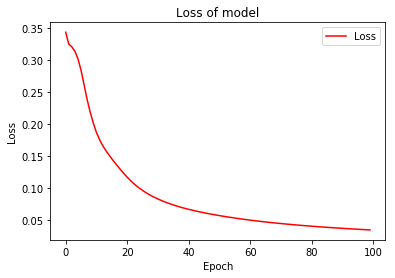

In [9]:
# make_loss_curve(loss_file, file_type)
val.make_loss_curve(
    loss_file = '../model/adv_train/FGSM_mnist_LeNet_LeNet/loss.txt',
    file_type = 'adv_train')

In [10]:
import tst

In [11]:
tst.accuracy_test(
    model = adv_model, 
    data_set = 'mnist'
    )

accuracy:97.550000%


## FGSM

In [12]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/FGSM_mnist_FNN/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:3.780000%


In [13]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/FGSM_mnist_LeNet/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:3.380000%


In [14]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/FGSM_mnist_ResNet18/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:5.280000%


## JSMA

In [15]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/JSMA_mnist_FNN/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:11.790000%


In [16]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/JSMA_mnist_LeNet/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:17.510000%


In [17]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/JSMA_mnist_ResNet18/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:5.250000%


## DEEPFOOL

In [18]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/DEEPFOOL_mnist_FNN/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:20.790000%


In [19]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/DEEPFOOL_mnist_LeNet/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:7.880000%


In [20]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/DEEPFOOL_mnist_ResNet18/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:3.030000%


## PGD

In [21]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/PGD_mnist_FNN/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:8.500000%


In [22]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/PGD_mnist_LeNet/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:5.350000%


In [23]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/PGD_mnist_ResNet18/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:7.050000%


## THREAT

In [24]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/THREAT_mnist/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:31.430000%
